In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, cross_validation
import matplotlib.pyplot as plt 

#Data preprocessing
adult_origin = pd.read_csv('C:/Users/zren3/OneDrive/Desktop/Study/CSCI6364/HW3/adult.csv', header = 0)
adult_cleaned = adult_origin[(adult_origin.astype(str) != '?').all(axis = 1)]
del adult_cleaned['education']

#Set dummy variable
adult_cleaned = pd.concat([adult_cleaned, pd.get_dummies(adult_cleaned['workclass'],prefix='workclass',prefix_sep=':')], axis=1)
adult_cleaned.drop('workclass',axis=1,inplace=True)
adult_cleaned = pd.concat([adult_cleaned,pd.get_dummies(adult_cleaned['marital.status'],prefix ='marital.status',prefix_sep=':')],axis=1)
adult_cleaned.drop('marital.status',axis=1,inplace=True)
adult_cleaned = pd.concat([adult_cleaned,pd.get_dummies(adult_cleaned['occupation'],prefix='occupation',prefix_sep=':')],axis=1)
adult_cleaned.drop('occupation',axis=1,inplace=True)
adult_cleaned = pd.concat([adult_cleaned,pd.get_dummies(adult_cleaned['relationship'],prefix='relationship',prefix_sep=':')],axis=1)
adult_cleaned.drop('relationship',axis=1,inplace=True)
adult_cleaned = pd.concat([adult_cleaned,pd.get_dummies(adult_cleaned['race'],prefix='race',prefix_sep=':')],axis=1)
adult_cleaned.drop('race',axis=1,inplace=True)
adult_cleaned = pd.concat([adult_cleaned,pd.get_dummies(adult_cleaned['sex'],prefix='sex',prefix_sep=':')],axis=1)
adult_cleaned.drop('sex',axis=1,inplace=True)
adult_cleaned = pd.concat([adult_cleaned,pd.get_dummies(adult_cleaned['native.country'],prefix='native.country',prefix_sep=':')],axis=1)
adult_cleaned.drop('native.country',axis=1,inplace=True)

#Set train,test sets
X = adult_cleaned.drop(['income'],1)
y = adult_cleaned['income']
X = preprocessing.scale(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size = 0.2)
X_train = pd.DataFrame(X_train,columns = adult_cleaned.drop(['income'],1).columns)
X_test = pd.DataFrame(X_test,columns = adult_cleaned.drop(['income'],1).columns)


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass:Federal-gov,workclass:Local-gov,workclass:Private,...,native.country:Portugal,native.country:Puerto-Rico,native.country:Scotland,native.country:South,native.country:Taiwan,native.country:Thailand,native.country:Trinadad&Tobago,native.country:United-States,native.country:Vietnam,native.country:Yugoslavia
1,82,132870,9,0,4356,18,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,34,216864,9,0,3770,45,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,38,150601,6,0,3770,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,74,88638,16,0,3683,20,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,68,422013,9,0,3683,40,<=50K,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10,45,172274,16,0,3004,35,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
11,38,164526,15,0,2824,45,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12,52,129177,13,0,2824,20,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [2]:
#Train XGboost model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb

model = xgb.XGBClassifier(learning_rate=0.1,
                           n_estimators=500,
                           max_depth=7,
                           min_child_weight=4
                           )
final_m=model.fit(X_train, y_train)
predictions = model.predict(X_test)
XGBA = accuracy_score(y_test, predictions)


C:\Python\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [3]:
#Result
print(model.get_params())
print("The Accuracy  is {}".format(XGBA))
p = precision_score(y_test, predictions, average='binary',pos_label='>50K')
r = recall_score(y_test, predictions, average='binary',pos_label='>50K')
f1score = f1_score(y_test, predictions, average='binary',pos_label='>50K')
print("precision: %s"% p)
print("recall: %s"% r)
print("f1score: %s"% f1score)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 7, 'min_child_weight': 4, 'missing': None, 'n_estimators': 500, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}
The Accuracy  is 0.8587767279960219
precision: 0.7533733133433284
recall: 0.6577225130890052
f1score: 0.7023060796645701


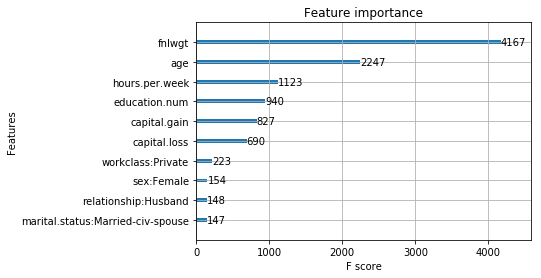

In [4]:
#Plot feature importance
xgb.plot_importance(final_m,max_num_features=10)
plt.show()

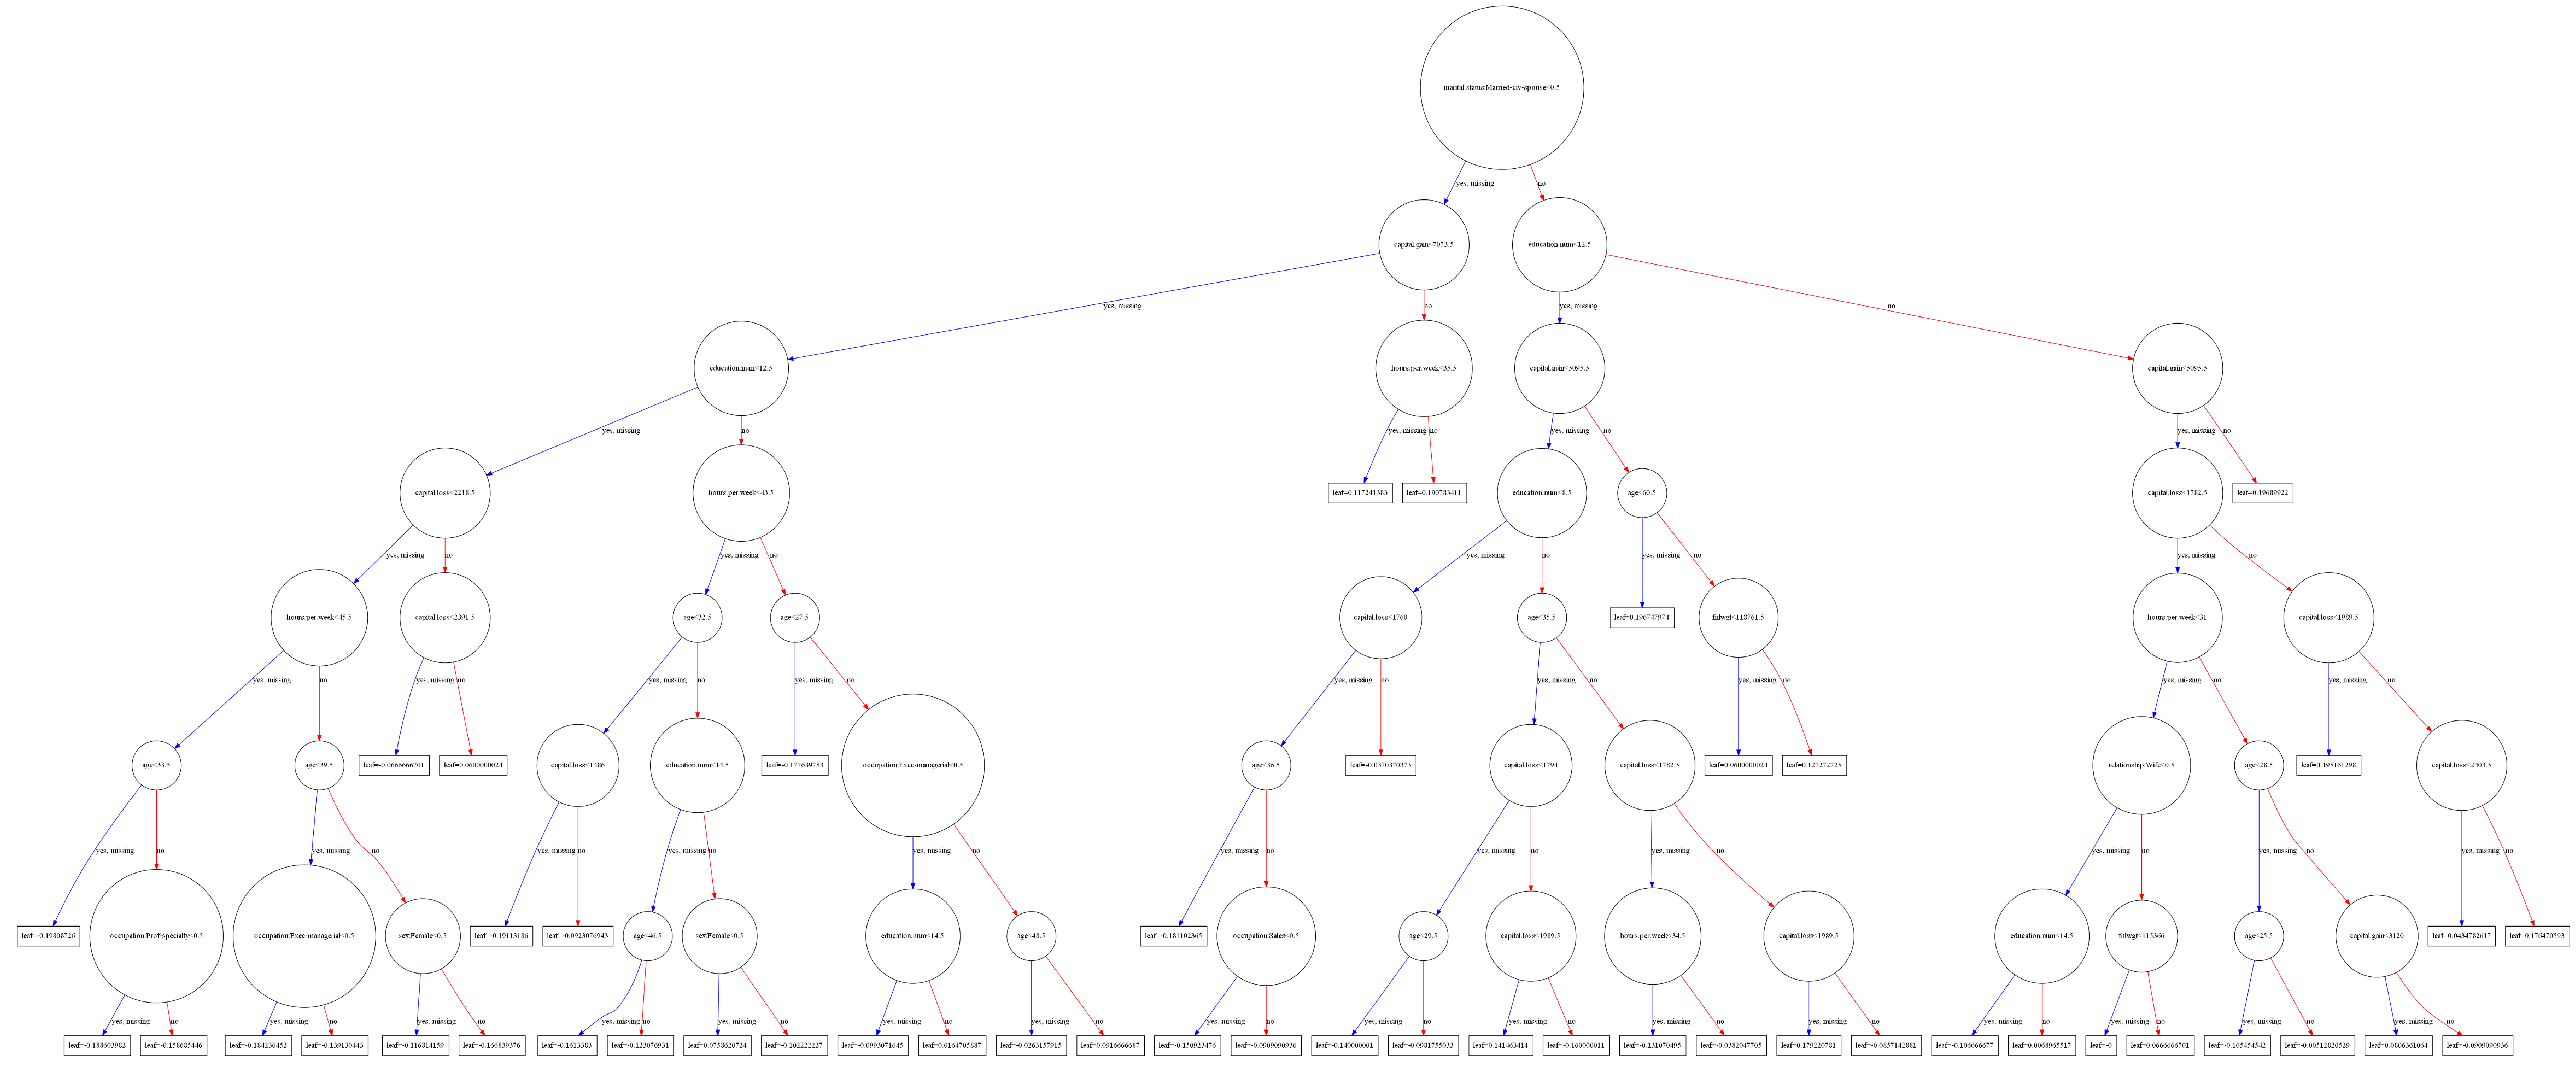

In [5]:
#plot tree diagram
import graphviz
def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()
ceate_feature_map(X_train.columns)

fig,ax = plt.subplots()
fig.set_size_inches(300,50)
xgb.plot_tree(final_m,ax = ax,fmap='xgb.fmap')